In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import sys
sys.path.append('../')

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from src.utils.block_dictionary import get_block_id_dictionary, get_block_color_dictionary
from src.config import (
    SKIPGRAM_COOCCURRENCE_MATRIX_PATH, 
    SKIPGRAM_UNIGRAM_DISTRIBUTION_PATH,
    SKIPGRAM_EMBEDDINGS_PATH,
)

In [15]:
block_id_dict = get_block_id_dictionary()
block_color_dict = get_block_color_dictionary()
cooccurrence_matrix = np.load(SKIPGRAM_COOCCURRENCE_MATRIX_PATH)
unigram_distribution = np.load(SKIPGRAM_UNIGRAM_DISTRIBUTION_PATH)
skipgram_embeddings = np.load(SKIPGRAM_EMBEDDINGS_PATH)

✅ Loaded 1005 block states from C:\Users\arnau\Desktop\blocksage\git\blocksage\data\block_id_dict.json.
✅ Loaded 1005 block colors from C:\Users\arnau\Desktop\blocksage\git\blocksage\data\block_color_dict.json.


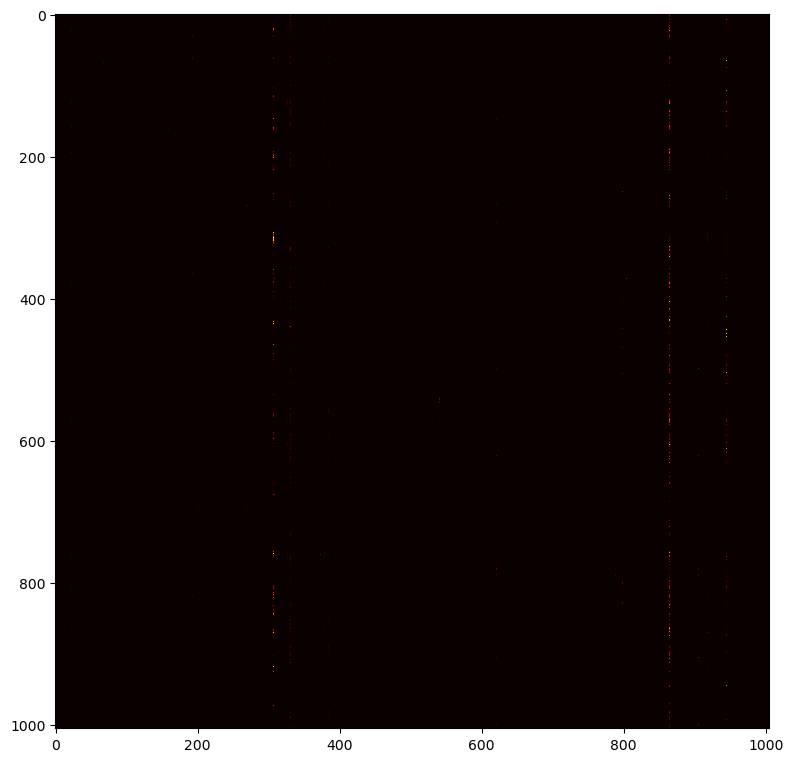

In [16]:
plt.figure(figsize=(8, 8))
plt.imshow(cooccurrence_matrix, cmap='hot', interpolation='nearest')
plt.tight_layout()
plt.show()

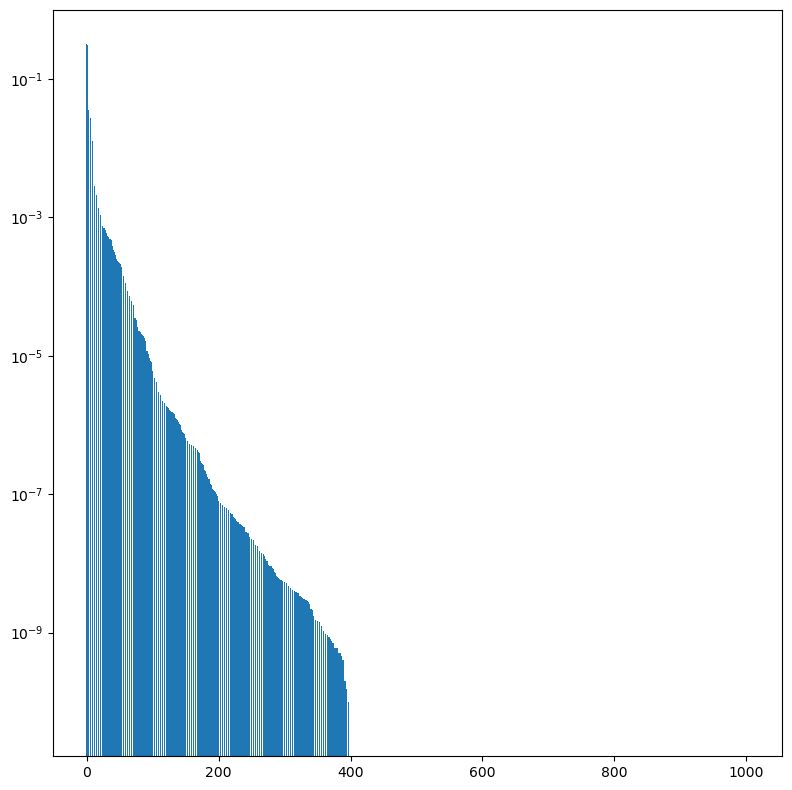

0.3211401

In [17]:
unigram_distribution_sorted = np.sort(unigram_distribution)[::-1]
unigram_distribution_sorted /= np.sum(unigram_distribution_sorted)
plt.figure(figsize=(8, 8))
plt.bar(np.arange(len(unigram_distribution_sorted)), unigram_distribution_sorted)
plt.tight_layout()
plt.yscale('log')
plt.show()

unigram_distribution_sorted[0]

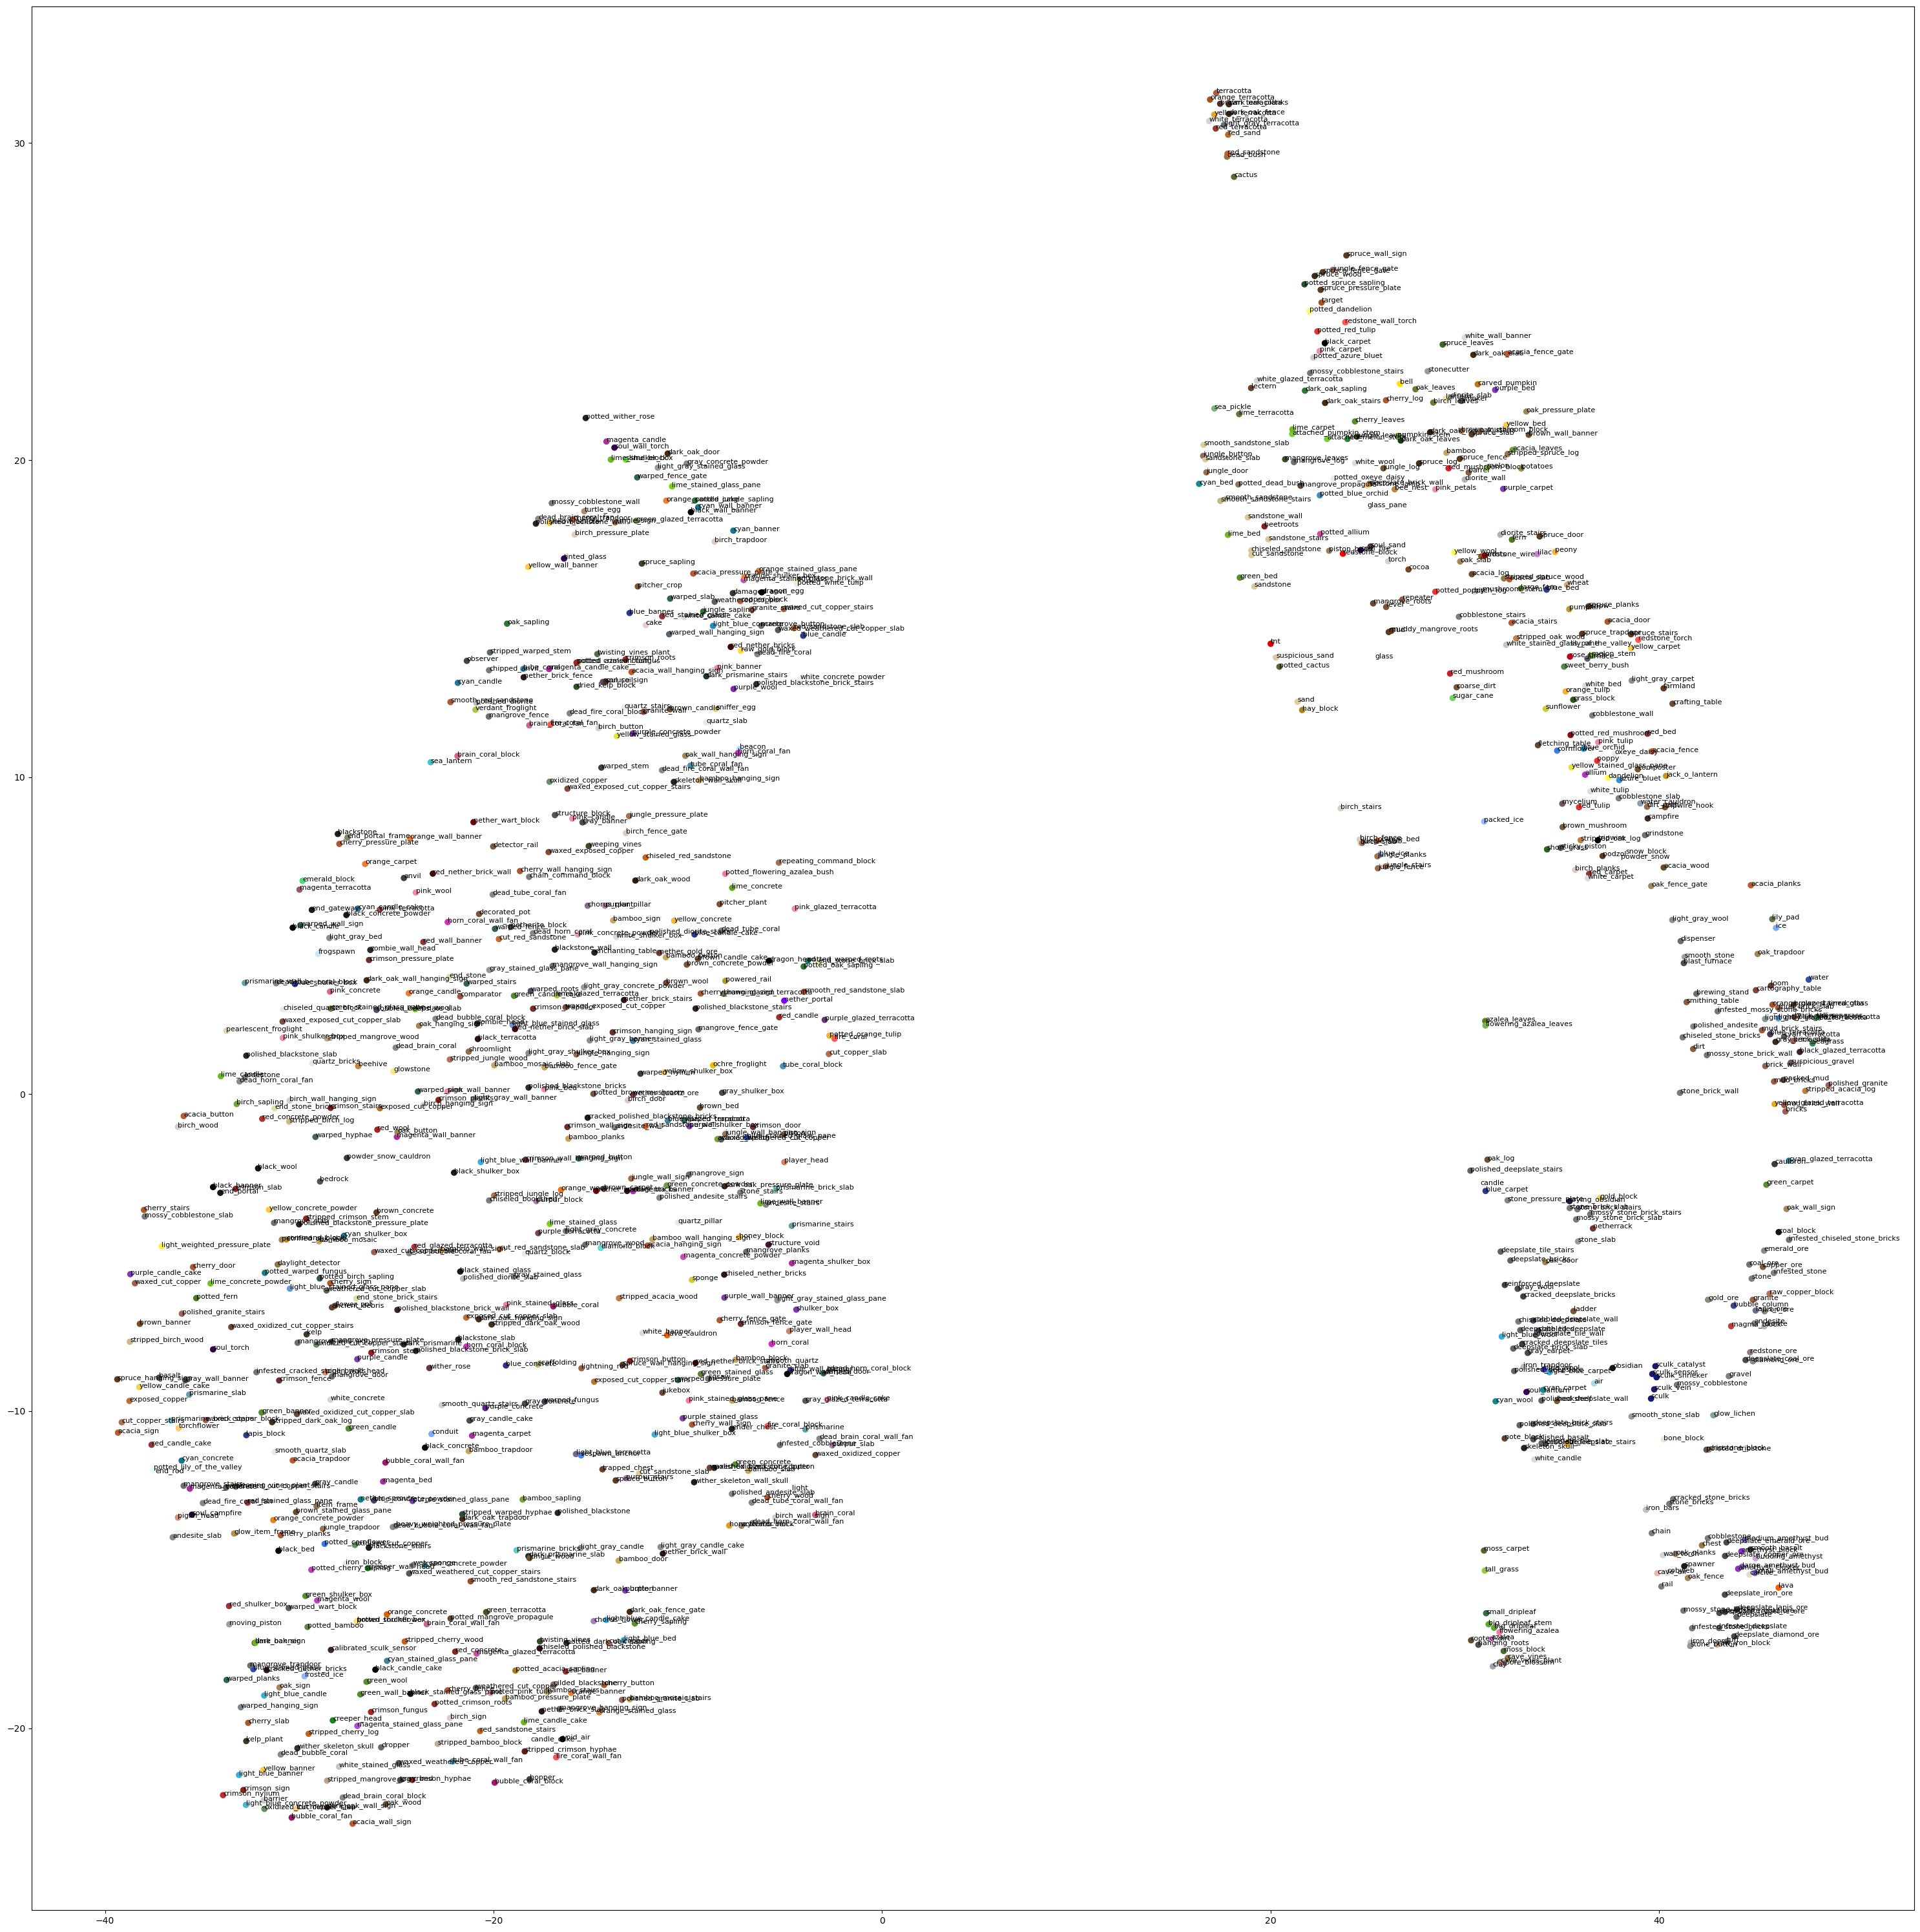

In [18]:
plt.figure(figsize=(30, 30))
tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
Y = tsne.fit_transform(skipgram_embeddings)

colors = [np.asarray(block_color_dict[block_id]) / 255 for block_id in block_id_dict.keys()]

plt.scatter(Y[:, 0], Y[:, 1], c=colors)
for label, x, y in zip(block_id_dict.keys(), Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=8)
plt.tight_layout()
plt.show()

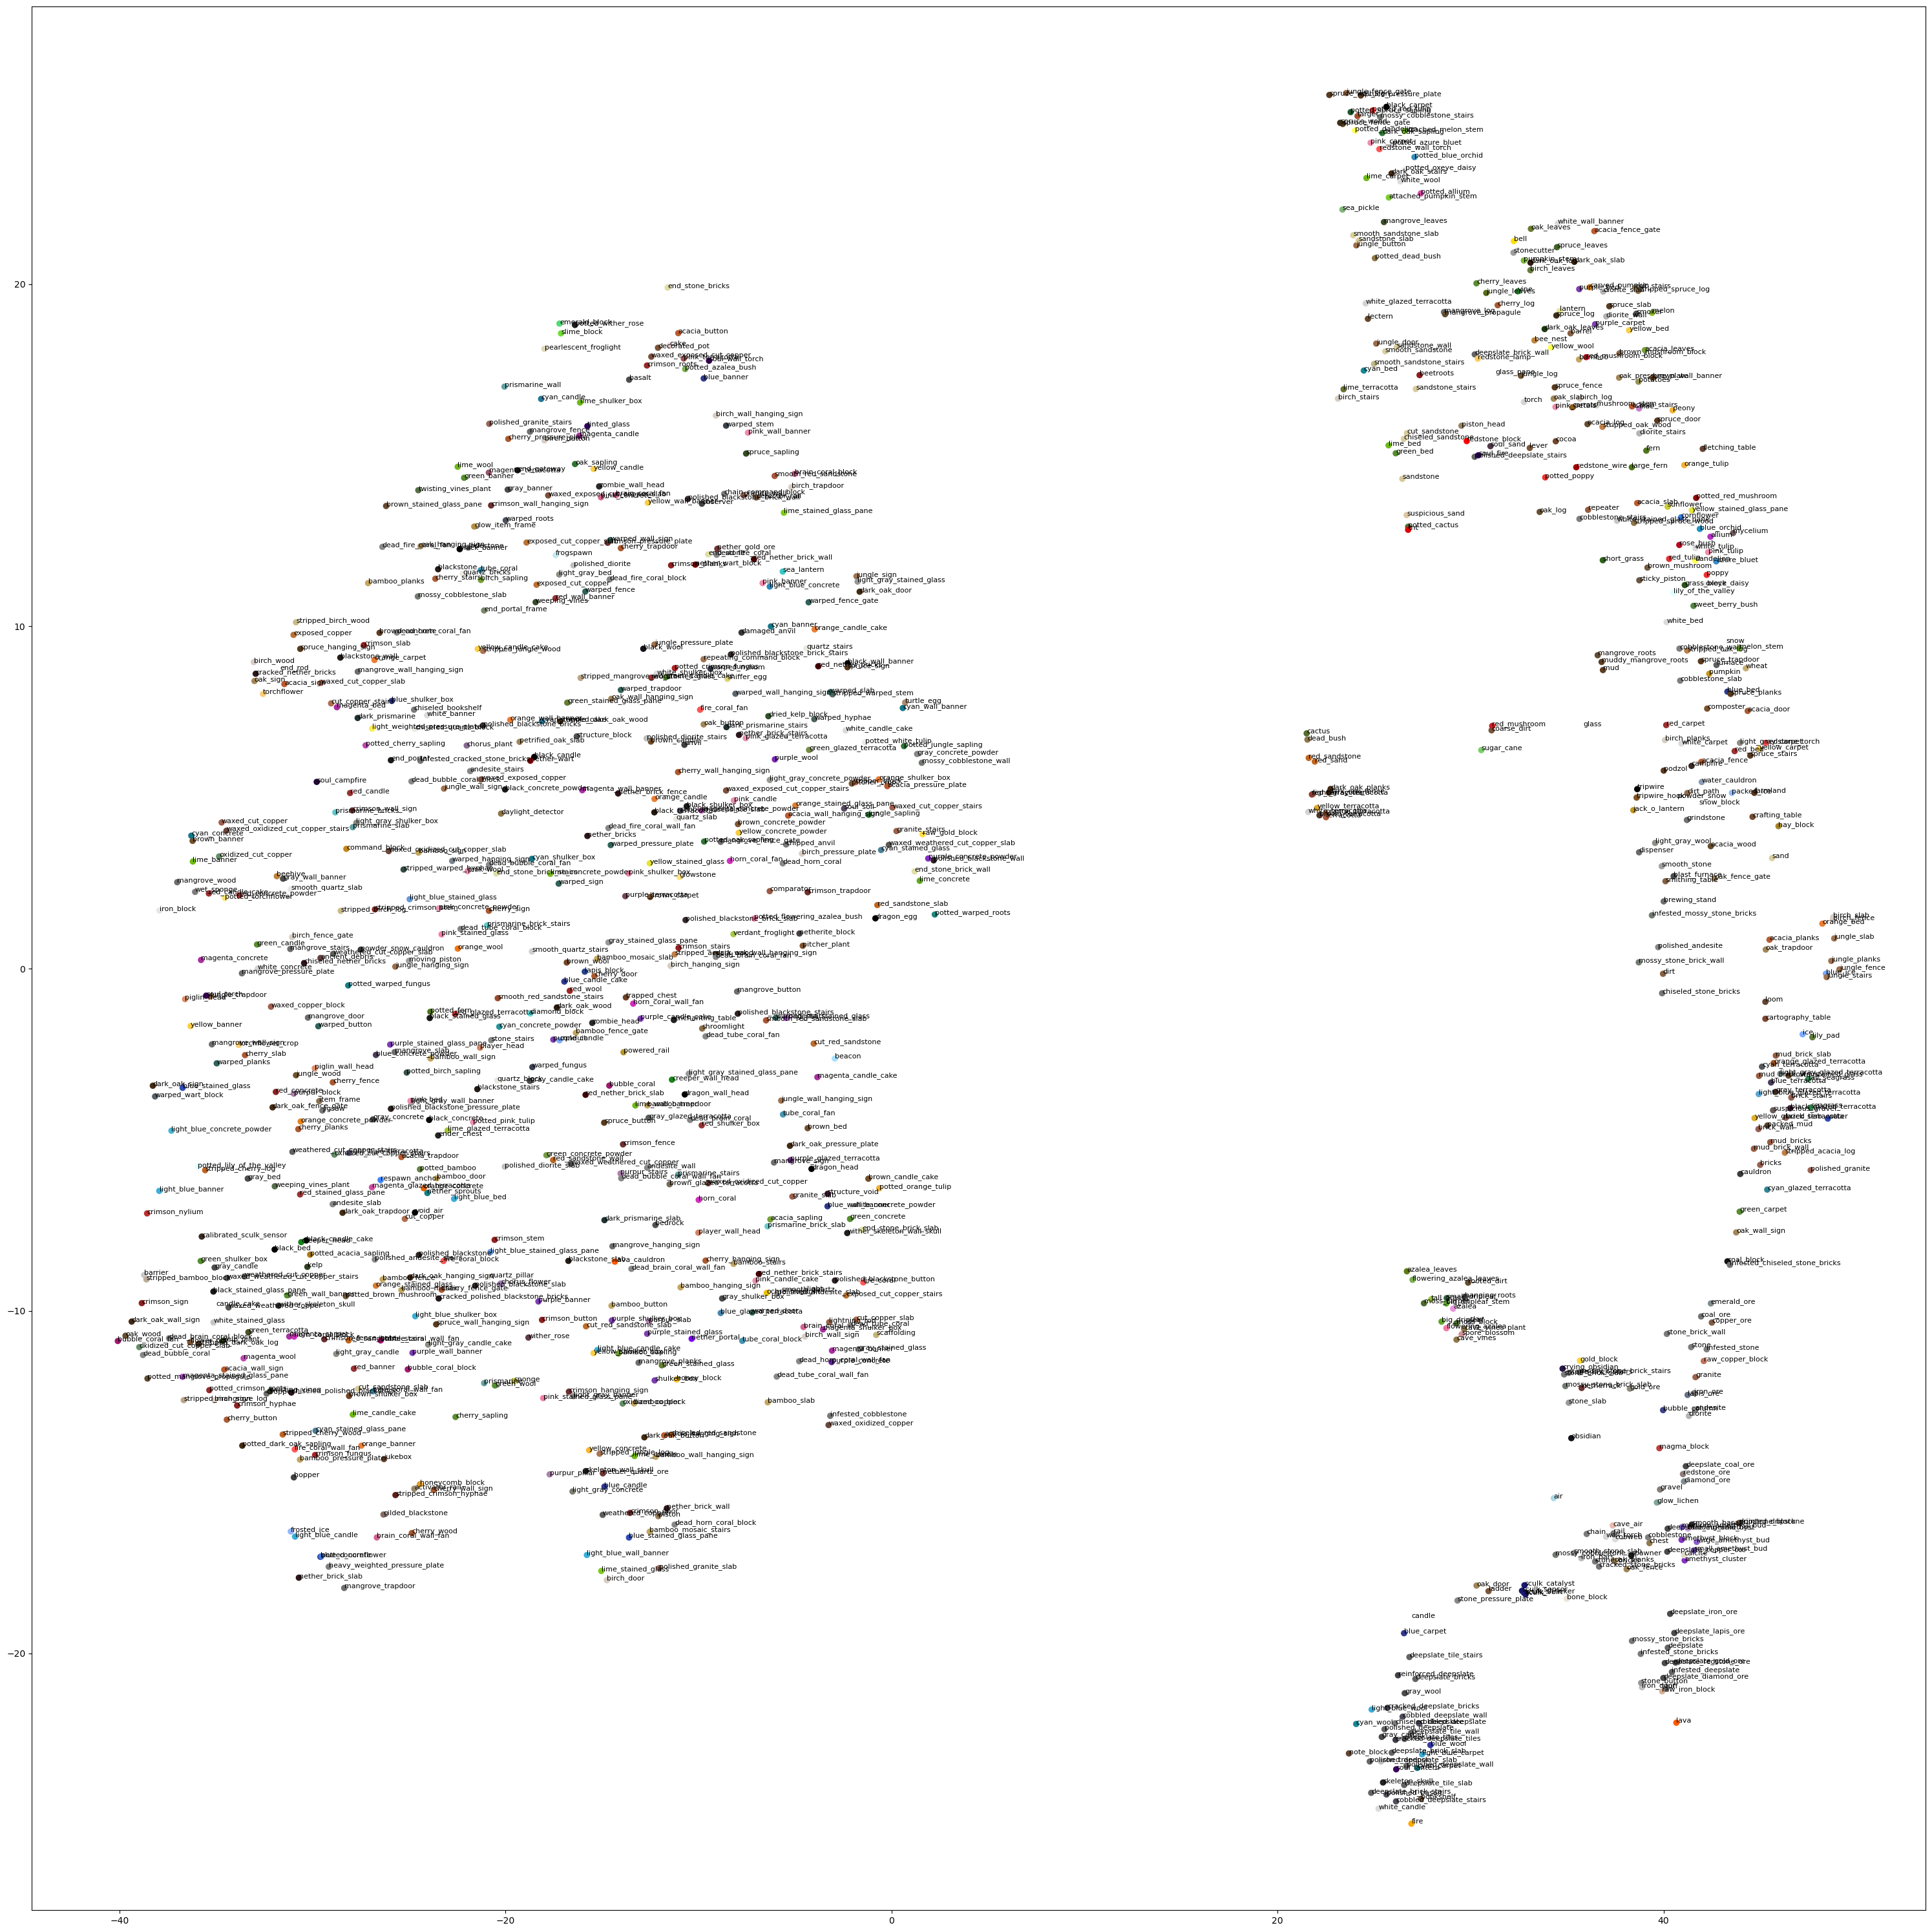

In [12]:
plt.figure(figsize=(30, 30))
tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
Y = tsne.fit_transform(skipgram_embeddings)

colors = [np.asarray(block_color_dict[block_id]) / 255 for block_id in block_id_dict.keys()]

plt.scatter(Y[:, 0], Y[:, 1], c=colors)
for label, x, y in zip(block_id_dict.keys(), Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=8)
plt.tight_layout()
plt.show()